In [1]:
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
#path = 'datas\household_power_consumption.txt' ## 全部数据
#path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

In [6]:
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [7]:
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[2]]

In [8]:
print (X.head(5))
print (Y.head(5))

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
#引入标准化方法
ss = StandardScaler()#要有数据的均值和方差

# ss = ss.fit(X_train)#用标准化方法对数据进行训练，得到标准化方法中的参数
# X_train = ss.transform(X_train)

X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test) 

In [11]:
lr = LinearRegression()
lr.fit(X_train, Y_train) 
y_predict = lr.predict(X_test) 

print ("准确率:",lr.score(X_test, Y_test))

mse = np.average((y_predict-np.array(Y_test))**2)
rmse = np.sqrt(mse)
print ("MSE:" ,mse)
print ("RMSE:",rmse)

准确率: 0.125516285137
MSE: 1.35511098995
RMSE: 1.16409234597


In [13]:
# from sklearn.externals import joblib

# joblib.dump(ss, "data_ss.model") 
# joblib.dump(lr, "data_lr.model") 

# joblib.load("data_ss.model") 
# joblib.load("data_lr.model")

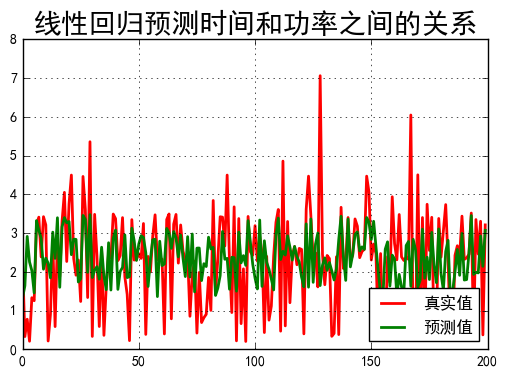

In [14]:
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

电流预测准确率:  0.992042060971
电流参数: [ 5.07744316  0.07191391]


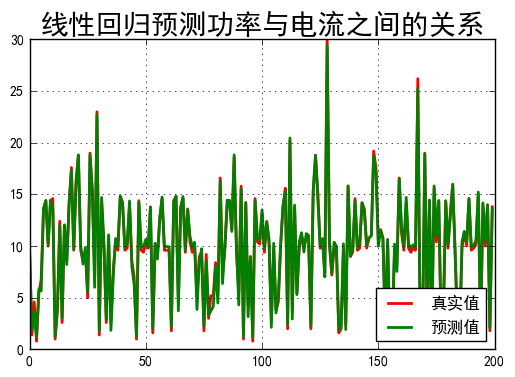

In [15]:
X = datas[names[2:4]]
Y2 = datas[names[5]]

X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train) 
X2_test = scaler2.transform(X2_test) 

lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train) 

Y2_predict = lr2.predict(X2_test)


print ("电流预测准确率: ", lr2.score(X2_test,Y2_test))
print ("电流参数:", lr2.coef_)

t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, Y2_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()